In [1]:
rem_0 = 0
rem_1 = 0.75
rem_2 = 0.25
for i in range(3, 151):
    p_head = 1 / i ** 2
    p_tail = 1 - p_head
    new_rem_0 = rem_2 * p_head + rem_0 * p_tail
    new_rem_1 = rem_0 * p_head + rem_1 * p_tail
    new_rem_2 = rem_1 * p_head + rem_2 * p_tail
    rem_0, rem_1, rem_2 = new_rem_0, new_rem_1, new_rem_2
print(rem_0)

0.10519515080601743


In [6]:
for i in range(1, 150):
    p_head = 1 / i ** 2
    p_tail = 1 - p_head
    p_not_dividible = (p_head * (1-p_head)) + (p_tail * (1-p_tail) * (1-p_tail)) + (p_tail * p_tail * (1-p_tail))
    p_dividible = 1 - p_not_dividible
    
print(p_not_dividble, p_dividible)

0.0 0.9999099180255859


28 0.9090909090909091


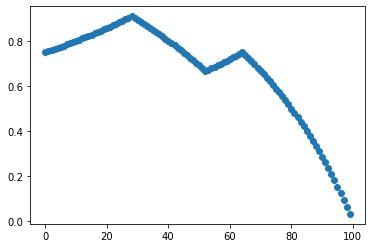

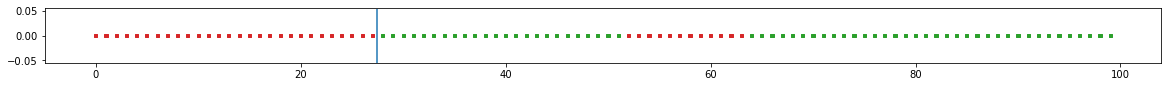

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
yandex_data =  [0] * 28 + [1] * 12 + [1] * 12 + [0] * 4 + [0] * 8 + [1] * 36 

# args: binary list (0-1 values) and threshold
def precision(data, threshold):
    # positive: data[threshold:] 
    # negative: data[:threshold]
    TP = sum(data[threshold:]) 
    FP = len(data[threshold:]) - TP
    if TP == 0 and FP == 0:
        return 0
    return TP / (TP + FP)

def recall(data, threshold):
    TP = sum(data[threshold:])
    FN = sum(data[:threshold])
    if TP == 0 and FN == 0:
        return 0
    return TP / (TP + FN)

def f_score(data, threshold):
    # print(threshold)
    _precision = precision(data, threshold)
    _recall = recall(data, threshold)
    if _precision == 0 and _recall == 0:
        return 0
    return 2 * _precision * _recall / (_precision + _recall)



X = []
y = []
for t in range(100):
    X.append(t)
    y.append(f_score(yandex_data, t))
    #print(t, f_score(yandex_data, t))
print(y.index(max(y)), max(y))
threshold = y.index(max(y))

plt.scatter(X, y)

fig = plt.figure(figsize=(20, 1))
plt.scatter(range(100), [0] * 100, marker='s',
           c=['tab:green' if res == 1 else 'tab:red' for res in yandex_data], s=10)
plt.scatter([threshold - 0.5], [0], marker='|', s=3000)

In [10]:
df = pd.read_csv('hw31.csv').set_index('Unnamed: 0')
df.head()

,x,F
Unnamed: 0,,
0,-6.650469,-17.091729
1,-3.057585,-17.150239
2,4.324625,-17.322252
3,2.513900,-17.034975
4,9.215339,-16.669917


In [11]:
import math
def f(a, b, c, x): 
    return a * math.cos(b * x) +c

def error(f, a, b, c, x, y_true):
    y_pred = f(a, b, c, x)
    return (y_true - y_pred) ** 2

def der_a(f, a, b, c, x, y_true):
    e1 = error(f, a, b, c, x, y_true)
    e2 = error(f, a + 0.0001, b, c, x, y_true)
    return (e2 - e1) / 0.0001
    
def der_b(f, a, b, c, x, y_true):
    e1 = error(f, a, b, c, x, y_true)
    e2 = error(f, a, b + 0.0001, c, x,  y_true)
    return (e2 - e1) / 0.0001
    
def der_c(f, a, b, c, x, y_true):
    e1 = error(f, a, b, c, x, y_true)
    e2 = error(f, a , b, c + 0.0001, x,  y_true)
    return (e2 - e1) / 0.0001

In [17]:
a, b, c = 1, 1, 1
learning_rate = 0.0001
for j in range(50):
    for _, row in df.iterrows():
        x, y_true = row[0], row[1]
        a -= learning_rate * der_a(f, a, b, c, x, y_true)
        b -= learning_rate * der_b(f, a, b, c, x, y_true)
        c -= learning_rate * der_c(f, a, b, c, x, y_true)
print(a, b, c)

-0.0885621995853785 1.1085700570702806 -16.99040248465327
